# TODO 1: EDA

## 1. Import Libary and Data

### 1.1 Libary

In [219]:
import pandas as pd
import numpy as  np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
from scipy.stats import norm
import random, warnings
warnings.filterwarnings("ignore")

### 1.2 Import Data

In [220]:
#import data
data = pd.read_csv('Ecommerce Customers.csv')
data['domain'] = data.Email.str.extract('\@([A-Za-z-.]+)')
data['city'] = data.Address.str.extract('\,([A-Za-z,\s]+)').replace(' ','')
data['city'] = data.city.apply(lambda x: str(x).replace(" ",""))
data = data.drop(['Email','Address'], axis = 1)
data.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain,city
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR


In [221]:
state = pd.read_csv('US-State-Abbreviations.csv')
data = pd.merge(data, state, how = 'left', left_on='city', right_on='ABBREVIATION')

In [222]:
gdp = pd.read_csv('GDP_STATE_2018.csv')
data = pd.merge(data, gdp, how = 'left', left_on='NAME', right_on='State')

In [223]:
data.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain,city,NAME,ABBREVIATION,TYPE,State,stateGDP,stateGDPperc,gdpGrowth2018
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,Michigan,MI,STATE,Michigan,524828.0,0.025,2.7
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,California,CA,STATE,California,3120386.0,0.147,3.5
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,District of Columbia,DC,Territory/Commonwealth,NaN,NaN,NaN,NaN
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,Ohio,OH,STATE,Ohio,683460.0,0.032,1.8
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,Puerto Rico,PR,Territory/Commonwealth,NaN,NaN,NaN,NaN


In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Avg. Session Length,500.0,33.053194,0.992563,29.532429,32.341822,33.082008,33.711985,3.613966e+01
Time on App,500.0,12.052488,0.994216,8.508152,11.388153,11.983231,12.753850,1.512699e+01
Time on Website,500.0,37.060445,1.010489,33.913847,36.349257,37.069367,37.716432,4.000518e+01
Length of Membership,500.0,3.533462,0.999278,0.269901,2.930450,3.533975,4.126502,6.922689e+00
Yearly Amount Spent,500.0,499.314038,79.314782,256.670582,445.038277,498.887875,549.313828,7.655185e+02
stateGDP,307.0,413744.377850,517693.935050,33278.000000,115900.000000,253849.000000,524828.000000,3.120386e+06
stateGDPperc,307.0,0.019505,0.024467,0.002000,0.005000,0.012000,0.025000,1.470000e-01
gdpGrowth2018,307.0,2.093160,1.145174,-0.300000,1.200000,2.000000,2.800000,5.700000e+00


In [224]:
data = data.drop(['ABBREVIATION','State'], axis = 1)

In [8]:
categorical = data.select_dtypes(include = 'object').columns
numerical = data.select_dtypes(include = ['int64','float64']).columns

## 2. EDA

### 2.1 Single Variable (Numerical)

#### Yearly Amount Spent

<AxesSubplot:xlabel='Yearly Amount Spent', ylabel='Density'>

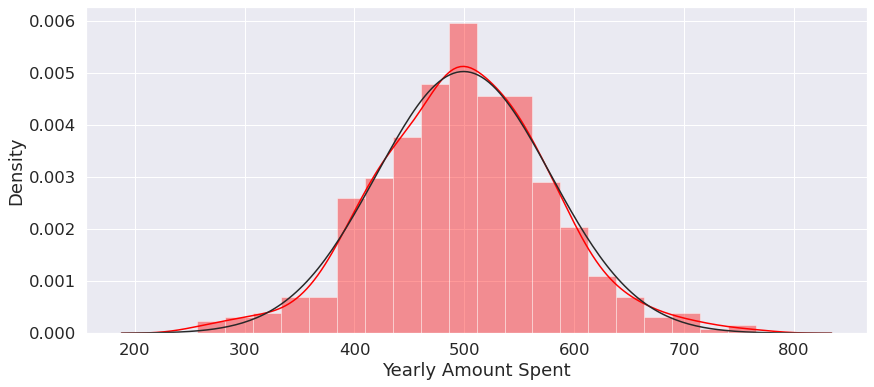

In [9]:
sns.set(style='darkgrid', font_scale=1.5, rc={"figure.figsize": [14, 6]})
sns.distplot(data['Yearly Amount Spent'], fit = norm, color='red')

<AxesSubplot:xlabel='Yearly Amount Spent'>

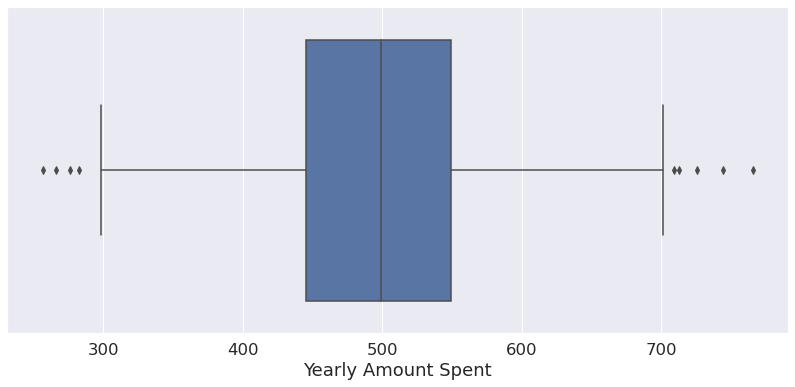

In [10]:
sns.set(style='darkgrid', font_scale=1.5, rc={"figure.figsize": [14, 6]})
sns.boxplot(data['Yearly Amount Spent'])

In [10]:
data['Yearly Amount Spent'].describe(percentiles=[0.05 * i for i in range(20)] + [0.99])

count    500.000000
mean     499.314038
std       79.314782
min      256.670582
0%       256.670582
5%       376.289978
10%      403.814258
15%      420.889387
20%      434.119702
25%      445.038277
30%      461.473469
35%      473.600002
40%      481.179778
45%      490.423213
50%      498.887875
55%      506.846675
60%      517.524905
65%      529.337741
70%      538.173507
75%      549.313828
80%      560.751435
85%      576.873184
90%      593.232262
95%      628.153250
99%      700.997273
max      765.518462
Name: Yearly Amount Spent, dtype: float64

In [11]:
Q1 = data['Yearly Amount Spent'].quantile(0.25)
Q3 = data['Yearly Amount Spent'].quantile(0.75)
IQR = Q3 - Q1
L1 = Q1 - 1.5*IQR
L3 = Q3 + 1.5*IQR

In [12]:
data[(data['Yearly Amount Spent'] < L1) | (data['Yearly Amount Spent'] > L3)].sort_values(by = 'Yearly Amount Spent')

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain,city,NAME,TYPE,stateGDP,stateGDPperc,gdpGrowth2018
225,Navy,32.836941,10.256549,36.143908,0.789520,256.670582,summers-davis.com,nan,NaN,NaN,NaN,NaN,NaN
303,GhostWhite,30.816201,11.851399,36.925043,1.084585,266.086341,richardson.com,PR,Puerto Rico,Territory/Commonwealth,NaN,NaN,NaN
415,SaddleBrown,31.517122,10.745189,38.791235,1.428824,275.918421,cook.info,NC,North Carolina,STATE,NaN,NaN,NaN
299,LightPink,30.492537,11.562936,35.976565,1.481617,282.471246,hotmail.com,NE,Nebraska,STATE,129761.0,0.006,1.5
368,Orchid,34.385820,12.729720,36.232110,5.705941,708.935185,gmail.com,VT,Vermont,STATE,33278.0,0.002,1.2
205,Gainsboro,34.967610,13.919494,37.952013,5.066697,712.396327,mcdonald-williams.com,NY,New York,STATE,NaN,NaN,NaN
50,SandyBrown,33.256335,13.858062,37.780265,5.976768,725.584814,gmail.com,UT,Utah,STATE,198630.0,0.009,4.3
157,Wheat,34.603311,12.207298,33.913847,6.922689,744.221867,yahoo.com,nan,NaN,NaN,NaN,NaN,NaN
65,OliveDrab,34.374258,15.126994,37.157624,5.377594,765.518462,diaz.org,IN,Indiana,STATE,379293.0,0.018,1.9


- Nhận xét về feature target Yearly Amount Spent:
1. Có giá trị bắt đầu từ 256 đến 756.
2. Dựa vào biểu đồ histogram phía trên ta có thể thấy phân bố của feature gần với phân phối chuẩn, không bị lệch hay bị nhọn. 
3. Dựa vào biểu đổ boxplot ta cũng thấy một số outlier của feature này, chúng ta cần cẩn thận xem xét những điểm dữ liệu này, vì đây là feature target nên việc biến đổi sẽ ảnh hưởng đến độ chính xác của model. Để đánh giá là outlier thật sự hay không phụ thuộc vào các feature liên quan đến nó.

--> Có thể kết luận biến này có phân bố rất lý tưởng để có thể cho vào model. Chúng ta chỉ cần check các outlier và scale trước khi cho vào model.

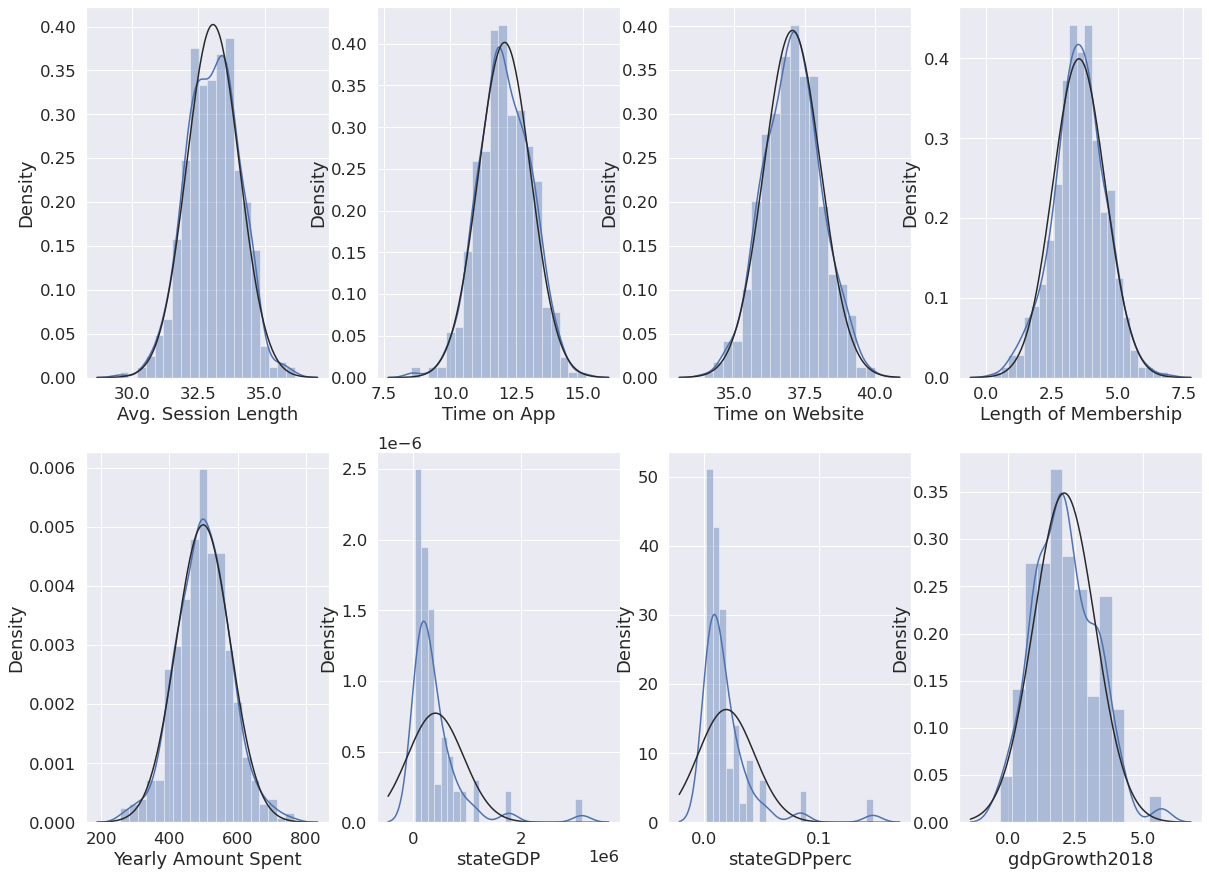

In [33]:
fig, ax = plt.subplots(2, 4, figsize=(20,15))
for i, subplot in zip(numerical, ax.flatten()):
    sns.distplot(data[i], fit=norm ,ax = subplot)

- Nhận xét:
1. Dựa vào các biểu đồ histogram trên những feature có sẵn của dữ liệu như: Avg Session Length, Time on App, Time on Website, Length of Memebership đều có dạng phân phối chuẩn. (Đường cong đen)
2. Những feature mapping từ outsource thì chỉ có khoảng 300 rows là có dữ liệu trên 500 rows của tập dữ liệu.
3. Dựa vào những feature mapping từ outsoure ta có thể hiểu hơn về dữ liệu là số tiền chi ra một năm của một cá nhân nào đó thuộc quốc tích US, với city là các State của US. Với số liệu GDP của các State năm 2018 có thể ta sẽ có một cái nhìn thú vị về việc chi tiêu của một cá nhân thuộc về một State có GDP hàng đầu có phải là cao hay không?.

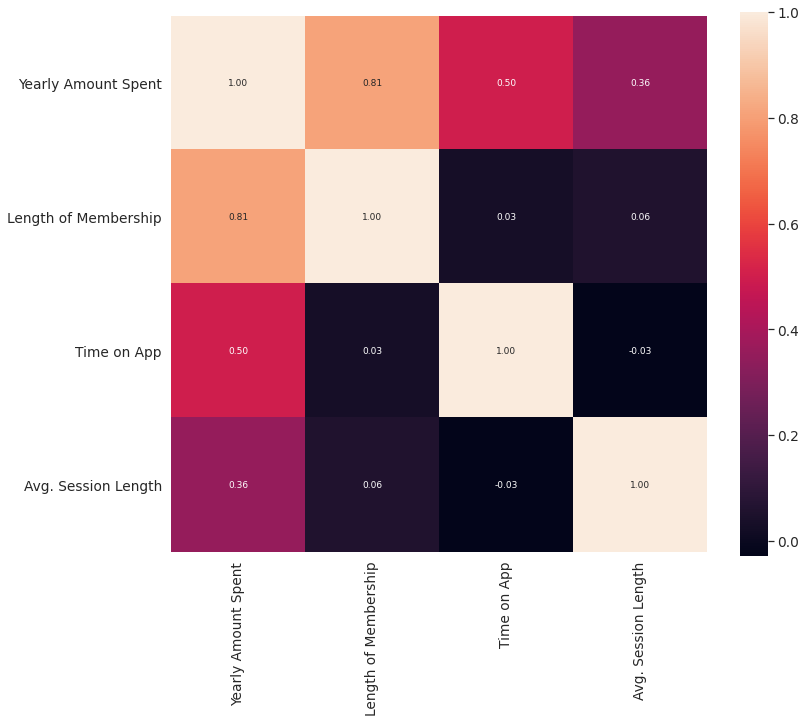

In [39]:
corrmat = data.corr()
k = 4 #number of variables for heatmap
f, ax = plt.subplots(figsize=(12, 10))
cols = corrmat.nlargest(k, 'Yearly Amount Spent')['Yearly Amount Spent'].index
cm = np.corrcoef(data[cols].values.T)
sns.set(font_scale=1.25)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':9},
yticklabels=cols.values,xticklabels=cols.values)
plt.show()

### 2.2 Single Variable (Categorical)

In [232]:
data = data.fillna(value={'TYPE': 'Unknown'})

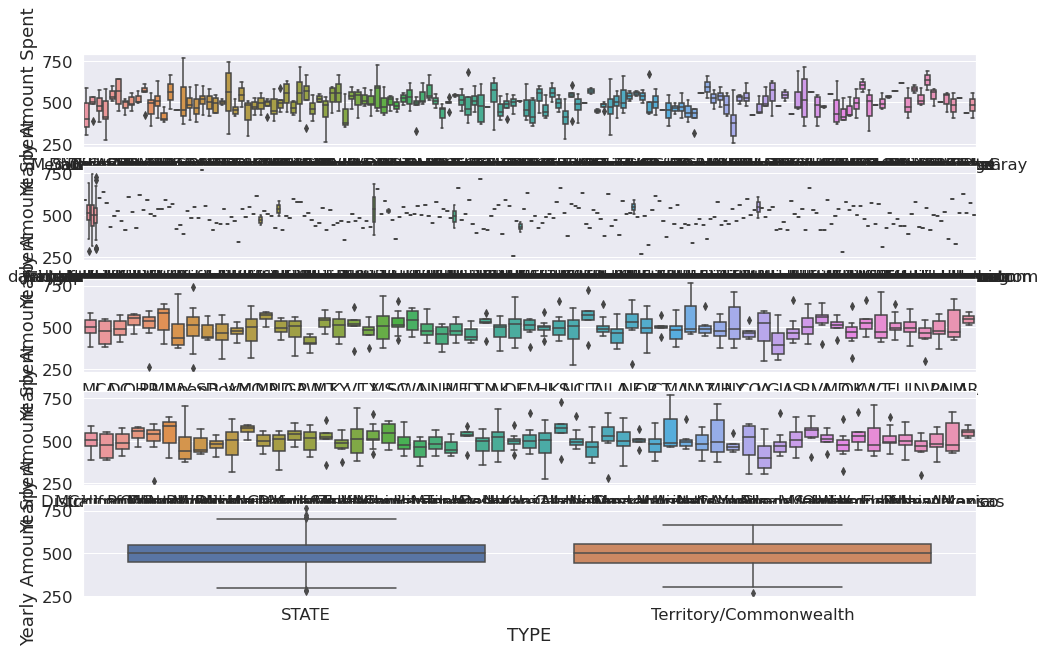

In [36]:
fig , ax = plt.subplots(5,1, figsize=(16,10))
for var, subplot in zip(categorical, ax.flatten()):
    sns.boxplot(x = data[var], y = data['Yearly Amount Spent'], ax=subplot)

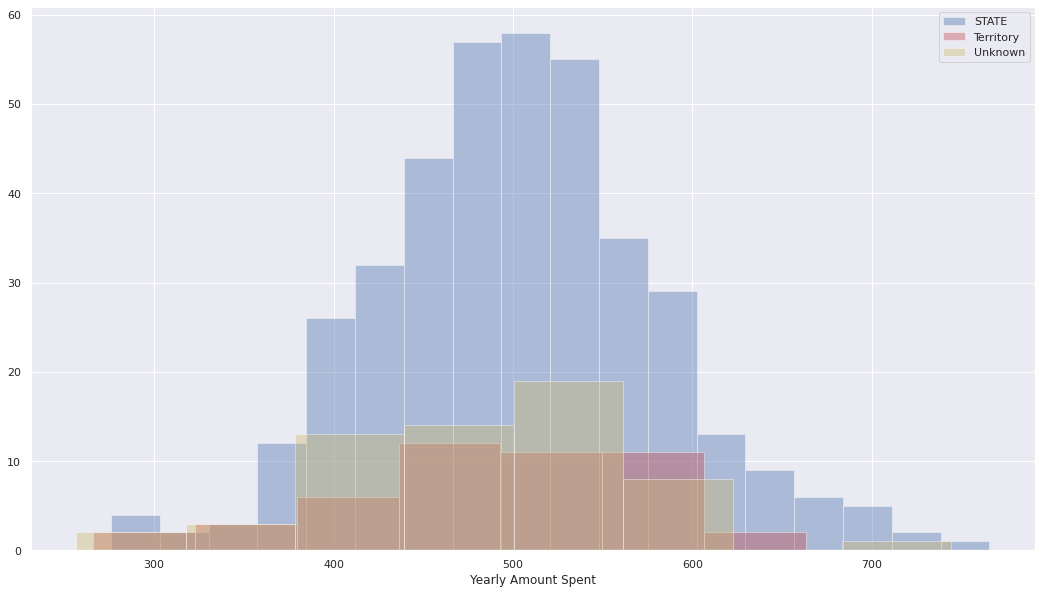

In [21]:
sns.set(style='darkgrid', font_scale=1.0, rc={"figure.figsize": [18, 10]})
sns.distplot(data[data['TYPE'] == 'STATE']['Yearly Amount Spent'],kde=False, color='b', label='STATE')
sns.distplot(data[data['TYPE'] == 'Territory/Commonwealth']['Yearly Amount Spent'],kde=False, color='r', label='Territory')
sns.distplot(data[data['TYPE'] == 'Unknown']['Yearly Amount Spent'],kde=False, color='y', label='Unknown')
plt.legend()

- Nhận xét về các feature categorical:
1. Có quá nhiều giá trị ở các feature categorical, việc phân tích sẽ khó khăn để có thể chắt lọc các thông tin chung cho bộ dữ liệu.
2. Về feature Email chúng ta có thể tách ra thành Domain và nhận thấy một nửa số email có domain này đều thuộc về cá nhân, công ty riêng nào đó, nửa còn lại là thuộc về các công ty công nghệ hàng đầu thế giới như: gmail -- goolge, hotmail -- Microsoft, yahoo -- Yahoo.
3. Feature Address chúng ta có thể tách các chữ cái viết tắt bên dưới và mapping lấy thông tin Name của State.
4. Có một điều thú vị ở feature Avatar là đa số đều là màu sắc ít các Avatar để là vật thể. Chúng ta có thể extract những màu sắc này phân loại về màu sắc trung tính, tươi sáng. Nếu được thì đây có thể là một feature thú vị.

### 2.3 Multiple Variable

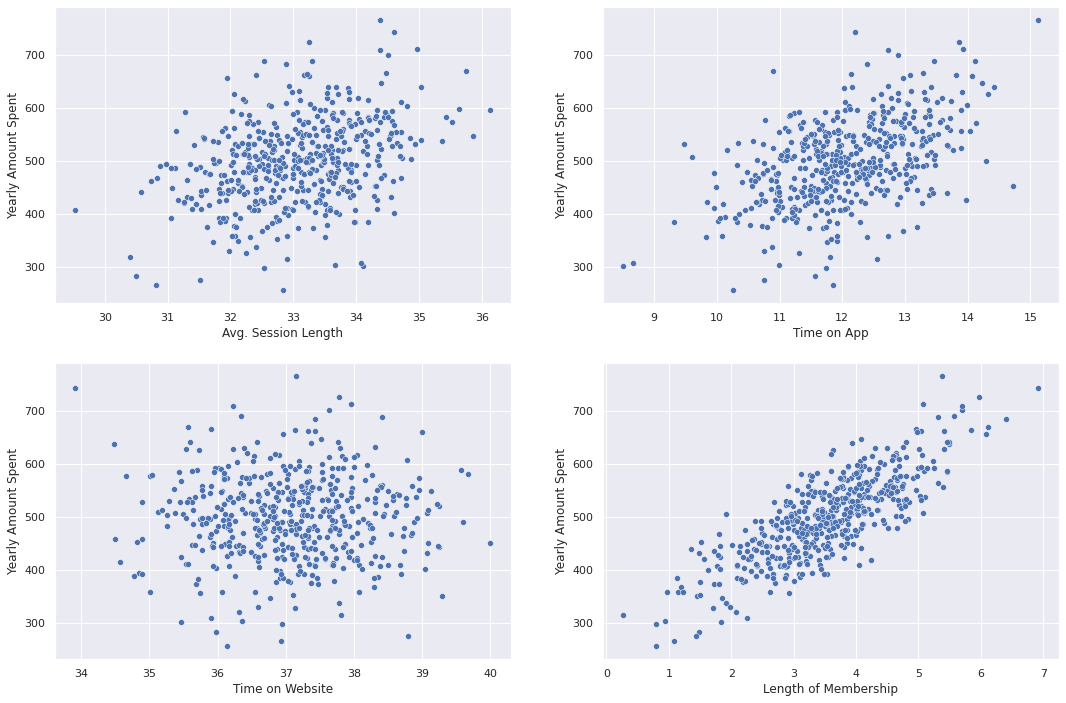

In [18]:
continous = ['Avg. Session Length', 'Time on App','Time on Website','Length of Membership']
fig, ax = plt.subplots(2, 2, figsize=(18, 12))
for var, subplot in zip(continous, ax.flatten()):
    sns.scatterplot(x=var, y='Yearly Amount Spent',data=data, ax=subplot)

- Nhận xét:
1. Dựa vào các biểu đồ scatter phía trên ta có thể thấy mối tương quan như biểu đồ heatmap đã thể hiện ở trên. 

    - Feature 'Length of Membership' có mối tương quan cao nhất là 0.81 và trên scatter thể hiện mối quan hệ khi 'Length of Membership' tăng thì 'Yearly Amount Spent'.
    - Feature 'Time on App' có mối tương quan với feature target là 0.5, và trên scatter tuy không thể hiện mối tương quan là một đường thẳng như 'Length of Membership'  nhưng về tổng quát đây là một mối tương quan tuyến tính.
    - Feature 'Avg. Session Length' có mối tương quan không cao với feature target, và dựa vào biểu đồ scatter ta cũng có thể thấy được điều này rõ ràng hơn, phần lớn dữ liệu co cụm ở phần các giá trị trung tâm của feature 'Avg. Session Length' không thấy mối liên hệ rõ ràng ở việc nếu 'Avg. Session Length' tăng thì 'Yearly Amount Spent'.

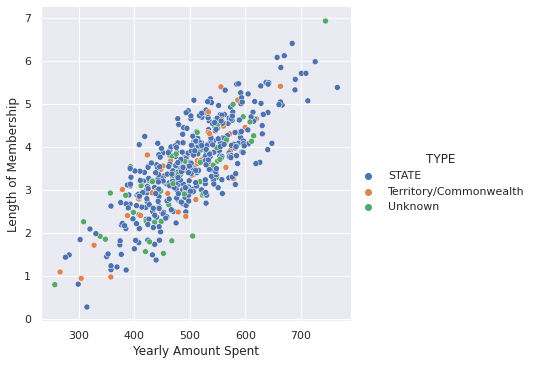

In [47]:
sns.set(style='darkgrid', font_scale=1.0, rc={"figure.figsize": [24, 10]})
sns.relplot(data = data, x = 'Yearly Amount Spent', y = 'Length of Membership', hue = 'TYPE')

In [225]:
data['domain_type'] = data.domain.apply(lambda x: 'company' if x == 'hotmail.com'
                                                               or x == 'gmail.com' or x == 'yahoo.com'
                                       else 'individual')

In [226]:
data['domain_site'] = data.domain.apply(lambda x: 'hotmail' if x == 'hotmail.com' else
                                                  'gmail' if  x == 'gmail.com' else
                                                   'yahoo' if x == 'yahoo.com'
                                       else 'other')

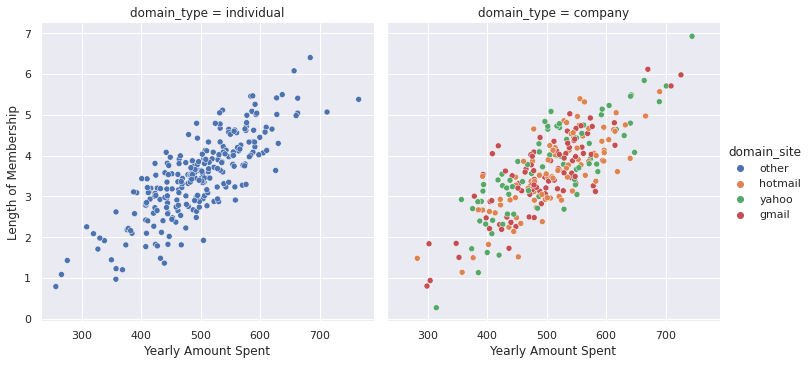

In [27]:
sns.set(style='darkgrid', font_scale=1.0, rc={"figure.figsize": [24, 10]})
sns.relplot(data = data, x = 'Yearly Amount Spent', y = 'Length of Membership', hue = 'domain_site',col = 'domain_type')

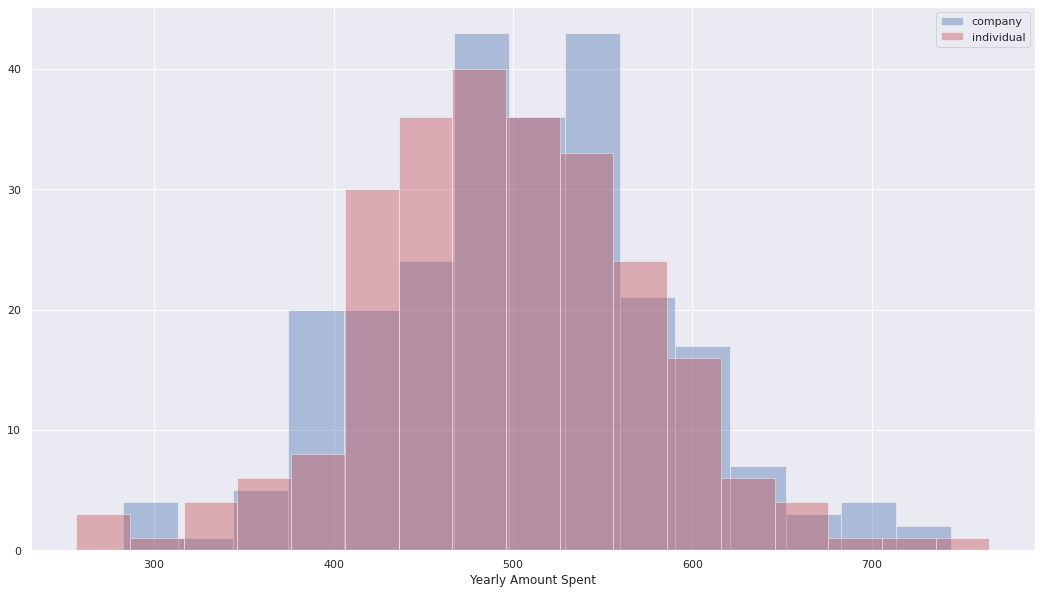

In [28]:
sns.set(style='darkgrid', font_scale=1.0, rc={"figure.figsize": [18, 10]})
sns.distplot(data[data['domain_type'] == 'company']['Yearly Amount Spent'],kde=False, color='b', label='company')
sns.distplot(data[data['domain_type'] == 'individual']['Yearly Amount Spent'],kde=False, color='r', label='individual')
plt.legend()

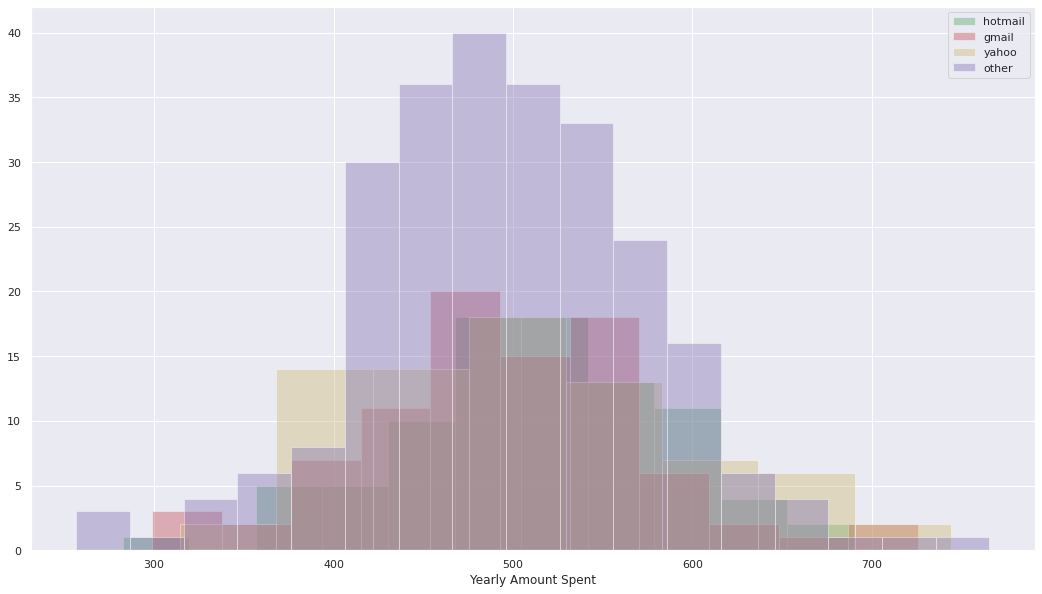

In [32]:
sns.set(style='darkgrid', font_scale=1.0, rc={"figure.figsize": [18, 10]})
sns.distplot(data[data['domain_site'] == 'hotmail']['Yearly Amount Spent'],kde=False, color='g', label='hotmail')
sns.distplot(data[data['domain_site'] == 'gmail']['Yearly Amount Spent'],kde=False, color='r', label='gmail')
sns.distplot(data[data['domain_site'] == 'yahoo']['Yearly Amount Spent'],kde=False, color='y', label='yahoo')
sns.distplot(data[data['domain_site'] == 'other']['Yearly Amount Spent'],kde=False, color='m', label='other')
plt.legend()

<AxesSubplot:xlabel='TYPE', ylabel='Yearly Amount Spent'>

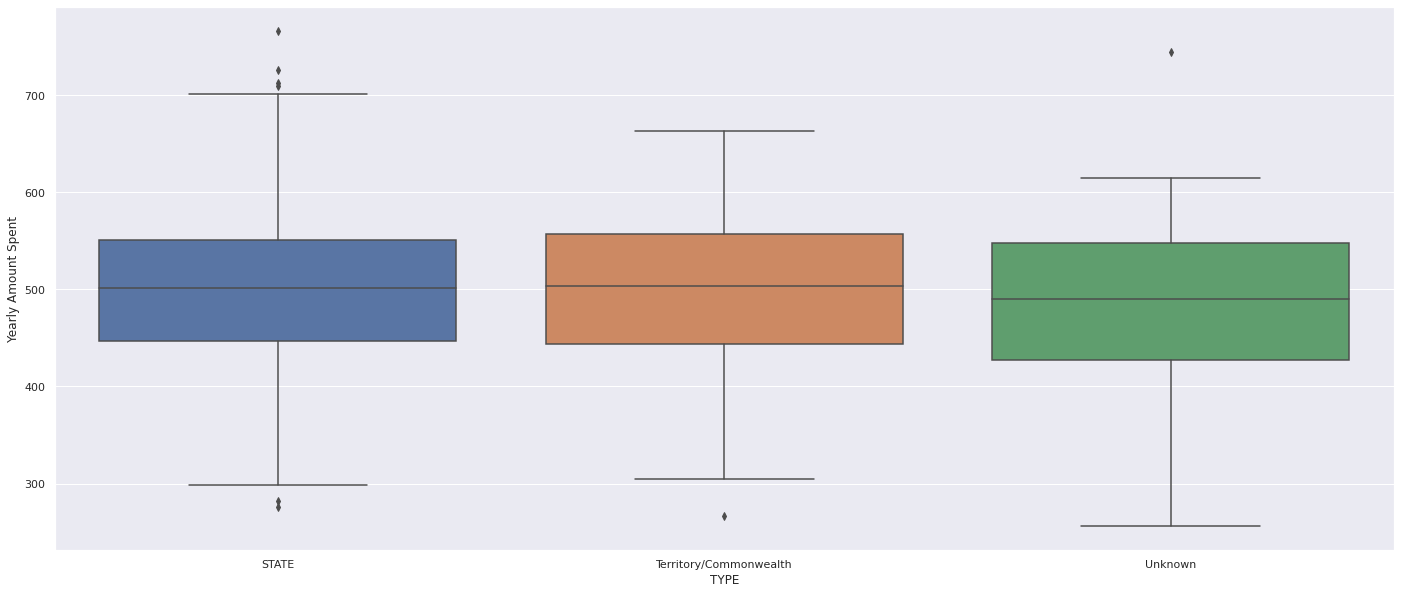

In [16]:
sns.boxplot(x = 'TYPE', y = 'Yearly Amount Spent', data = data)

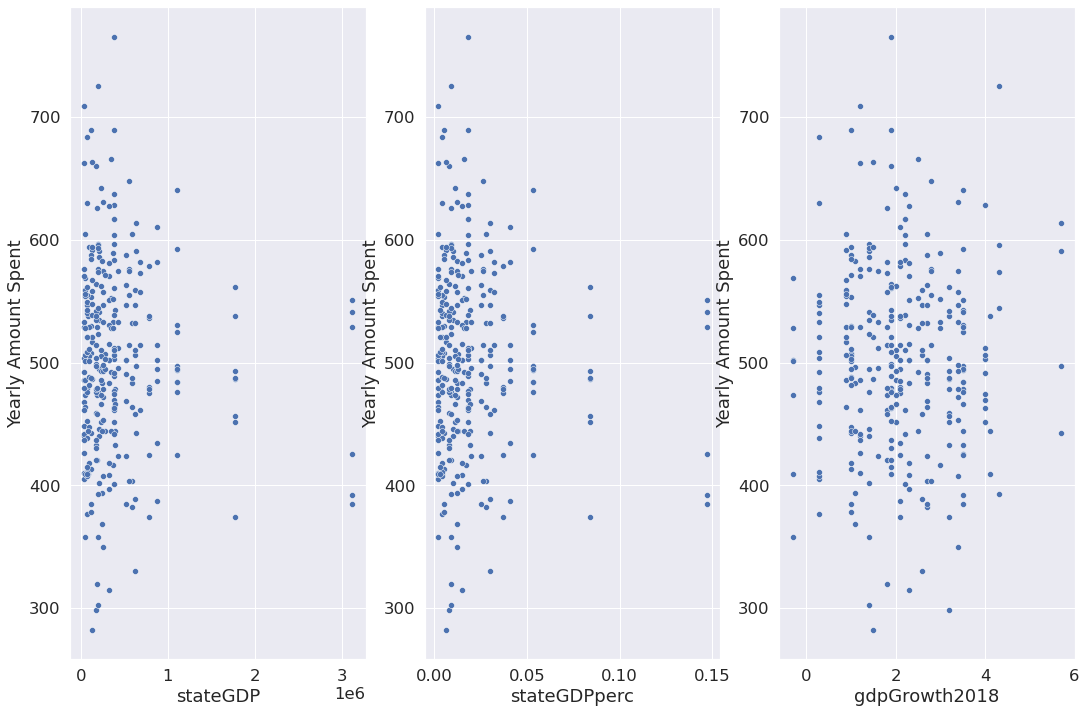

In [21]:
continous = ['stateGDP','stateGDPperc', 'gdpGrowth2018']
fig, ax = plt.subplots(1, 3, figsize=(18, 12))
for var, subplot in zip(continous, ax.flatten()):
    sns.scatterplot(x=var, y='Yearly Amount Spent',data=data, ax=subplot)

- Nhận xét:
    - Với feature outsource là 'stateGDP' dựa vào biểu đồ scatter ta có thể thấy feature này gần như không ảnh hưởng tới feature target. Với mục đích ban đầu khi mapping feature là xem GDP của State càng cao thì khả năng chi tiêu có từ đó mà tăng cao không. Nhưng từ biểu đồ trên ta thấy một điều thú vị là mục tiêu ban đầu đã không thành, GDP của một State gần như không ảnh hưởng gì đến khả năng chi tiêu của cá nhân cả.
    - Tương tự với các feature 'stateGDPperc', 'gdpGrowth2018'.
    --> Tại bước processing data trước khi sử dụng model chúng ta có thể bỏ feature này.

#### Tổng kết nhận xét:
- Đây là một tập dữ liệu về việc chi tiêu theo năm của các cá nhân trên nước Mỹ, điều này được biết sau khi phân tích thông tin Address để extract các State và Territory/Commonwealthm, sử dụng các thông tin về tên viết tắt cũng như tên State để mapping thông tin GDP 2018 của các State.
- Extract các thông tin domain từ Email của các cá nhân,có một điều thú vị ở tập dữ liệu là một nưả là thuộc về các công ty công nghệ lớn hàng đầu trên thế giới còn lại là từ cá nhân hoặc một tập thể nào đó.
1. Feature target bị ảnh hưởng mạnh bởi các yếu tố 'Length Membership' và 'Time on App'. Tiếp đến là 'Time on App' và 'Avg Session Length' còn những feature numerical còn lại đều có độ tương quan âm với feature target. Chúng ta có thể bỏ chúng khi sử dụng data cho model. Nhưng nếu chúng ta có quá ít feature thì việc bỏ có feature này có ảnh hưởng tới độ chính xác của model hay không chúng ta sẽ thử ở phần model.
2. Còn về các feature categorical thì có quá nhiều thông tin riêng lẻ, việc xử lý và đưa vào model là khó khăn vì vậy cần có hướng generate một số feature mới để làm đa dạng thông tin cho dữ liệu nhưng phải đảm bảo độ chính xác.

# TODO 2: Linear Regressions

## 1. Data Processing

### 1.1 Numerical

In [70]:
process = data.copy()

In [71]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [72]:
#min_max_scale = MinMaxScaler()
standard = StandardScaler()
process[numerical] = standard.fit_transform(process[numerical])

In [73]:
process.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain,city,NAME,TYPE,stateGDP,stateGDPperc,gdpGrowth2018,domain_type,domain_site
0,Violet,1.456351,0.607280,2.493589,0.550107,1.118654,fernandez.com,MI,Michigan,STATE,0.214924,0.224964,0.530776,individual,other
1,DarkGreen,-1.136502,-0.949464,0.206556,-0.870927,-1.351783,hotmail.com,CA,California,STATE,5.236802,5.219512,1.230501,company,hotmail
2,Bisque,-0.052723,-0.727139,0.049681,0.572067,-0.148501,yahoo.com,DC,District of Columbia,Territory/Commonwealth,NaN,NaN,NaN,company,yahoo
3,SaddleBrown,1.263010,1.676390,-0.335978,-0.413996,1.041684,gmail.com,OH,Ohio,STATE,0.521845,0.511536,-0.256414,company,gmail
4,MediumAquaMarine,0.279838,0.747770,0.471737,0.914422,1.263224,davidson-herman.com,PR,Puerto Rico,Territory/Commonwealth,NaN,NaN,NaN,individual,other


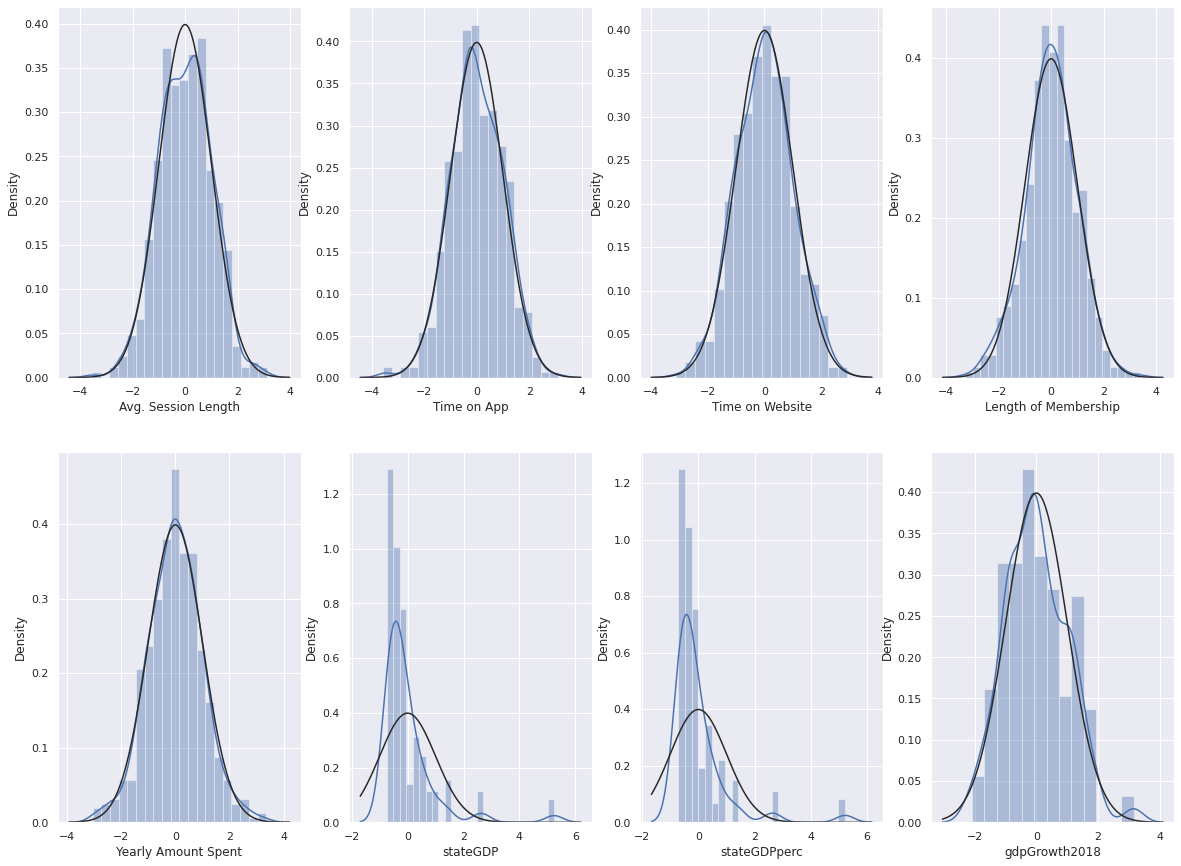

In [74]:
fig, ax = plt.subplots(2, 4, figsize=(20,15))
for i, subplot in zip(numerical, ax.flatten()):
    sns.distplot(process[i], fit=norm ,ax = subplot)

### 1.2 Categorical

In [75]:
delete_col = ['Avatar','domain','city','NAME','stateGDP','stateGDPperc','gdpGrowth2018']

In [76]:
process = process.drop(delete_col, axis=1)

In [77]:
process = pd.get_dummies(process)

In [78]:
process.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,TYPE_STATE,TYPE_Territory/Commonwealth,TYPE_Unknown,domain_type_company,domain_type_individual,domain_site_gmail,domain_site_hotmail,domain_site_other,domain_site_yahoo
0,1.456351,0.607280,2.493589,0.550107,1.118654,1,0,0,0,1,0,0,1,0
1,-1.136502,-0.949464,0.206556,-0.870927,-1.351783,1,0,0,1,0,0,1,0,0
2,-0.052723,-0.727139,0.049681,0.572067,-0.148501,0,1,0,1,0,0,0,0,1
3,1.263010,1.676390,-0.335978,-0.413996,1.041684,1,0,0,1,0,1,0,0,0
4,0.279838,0.747770,0.471737,0.914422,1.263224,0,1,0,0,1,0,0,1,0


### 1.3 Model

In [79]:
y = process['Yearly Amount Spent']
x = process.drop('Yearly Amount Spent', axis=1)

In [80]:
x_train, x_test , y_train, y_test= train_test_split(x,y,test_size=0.2,random_state = 12)

In [81]:
reg = LinearRegression().fit(x_train, y_train)

In [82]:
coef=pd.DataFrame([x_train.columns, reg.coef_]).T
coef=coef.rename(columns={0:'Attributes',1:'Coefficients'})
coef

,Attributes,Coefficients
0,Avg. Session Length,0.320318
1,Time on App,0.491699
2,Time on Website,0.008427
3,Length of Membership,0.775731
4,TYPE_STATE,1.41353e+12
5,TYPE_Territory/Commonwealth,1.41353e+12
6,TYPE_Unknown,1.41353e+12
7,domain_type_company,1.71979e+13
8,domain_type_individual,9.3488e+12
9,domain_site_gmail,1.40166e+12


#### Predict

In [83]:
ytest_pred = reg.predict(x_test)

#### Evaluation

In [84]:
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

R^2:  0.9790860245397659
MAE:  0.1011379027946562
MSE:  0.015777315283938945
RMSE:  0.12560778353246643
Max Error:  0.3464963338386126


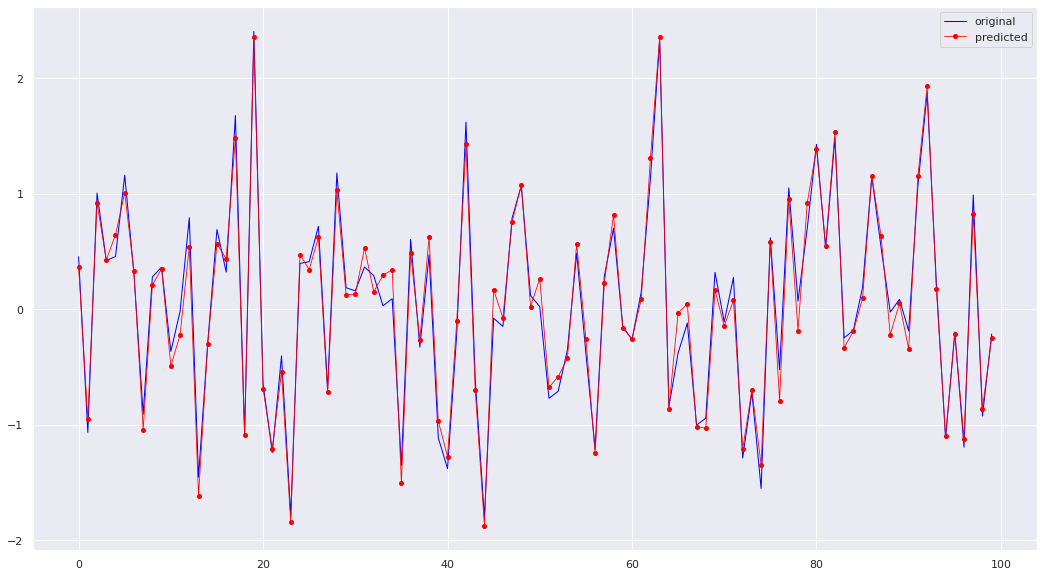

In [85]:
x_ax = range(len(x_test))
plt.plot(x_ax, y_test, lw=1, color="blue", label="original")
plt.plot(x_ax, ytest_pred, lw=0.8, color="red", label="predicted",marker="o", markersize=4)
plt.legend()
plt.show()

In [86]:
df_plot = pd.DataFrame({'pred_price': ytest_pred, 'actual_price': y_test})
df_plot.head()

,pred_price,actual_price
475,0.363281,0.454438
385,-0.949219,-1.064915
167,0.921875,1.005513
40,0.425781,0.422005
350,0.644531,0.456447


In [57]:
max_y = np.max(data['Yearly Amount Spent'])
min_y = np.min(data['Yearly Amount Spent'])

In [87]:
mean_y = np.mean(data['Yearly Amount Spent'])
var_y = np.var(data['Yearly Amount Spent'])

In [63]:
def revert_minmax(x):
    a = (max_y - min_y)
    z = (x * a) + min_y
    return z

In [93]:
def revert_std(x):
    z = (x * np.sqrt(var_y)) + mean_y
    return z

In [95]:
ytest_pred = revert_std(ytest_pred)
y_test = revert_std(y_test)

In [96]:
lin_acc=metrics.r2_score(ytest_pred, y_test)
print("R^2: ",lin_acc)
print("MAE: ", metrics.mean_absolute_error(ytest_pred, y_test))
print("MSE: ", metrics.mean_squared_error(ytest_pred, y_test))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(ytest_pred, y_test)))
print("Max Error: ", metrics.max_error(ytest_pred, y_test))

R^2:  0.9790860245397659
MAE:  8.01370492100586
MSE:  99.05397548503664
RMSE:  9.95258637164414
Max Error:  27.454784990258815


In [97]:
df_plot = pd.DataFrame({'pred_price': ytest_pred, 'actual_price': y_test})
df_plot

,pred_price,actual_price
475,528.098783,535.321610
385,424.102285,414.935061
167,572.359198,578.986259
40,533.050997,532.751788
350,550.383747,535.480775
...,...,...
376,482.290802,483.796522
317,410.483696,404.824529
466,564.930876,577.736025
252,431.221093,426.154548


# TODO 3: CUSTOMER CLUSTERING

In [117]:
Cluster = data.copy()

In [118]:
features = ["Time on App", "Avg. Session Length", "Time on Website", "Length of Membership","Yearly Amount Spent"]

In [120]:
X = Cluster.loc[:, features]

##### Using Elbow Method to optimal k value of K-means.
- Link reference : [Elbow Method](https://en.wikipedia.org/wiki/Elbow_method_(clustering))

In [121]:
from sklearn.cluster import KMeans
wcss=[]

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

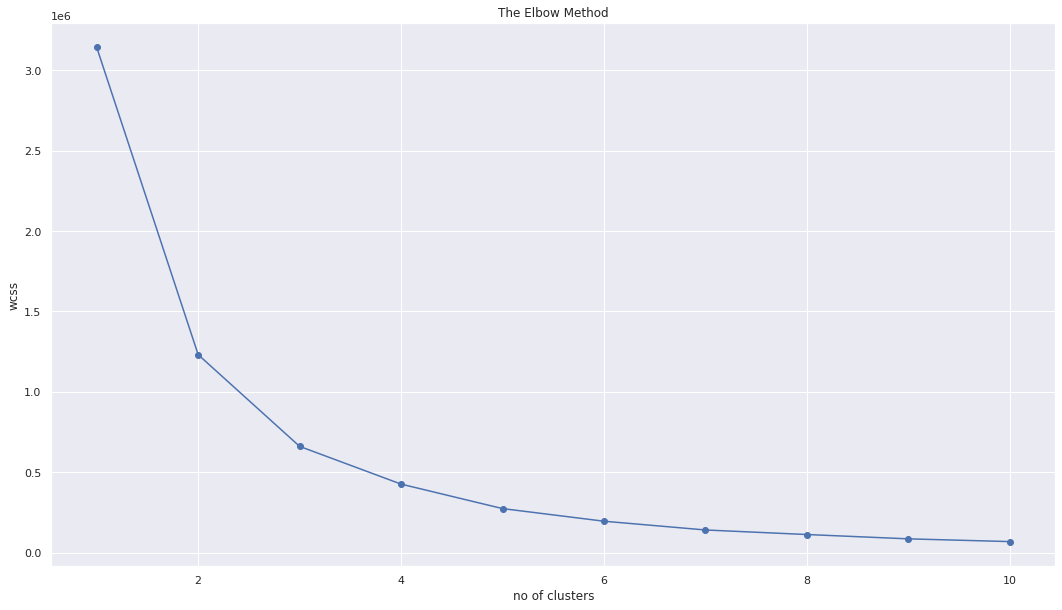

In [122]:
plt.plot(range(1,11), wcss, marker = "o")
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [123]:
kmeans = KMeans(n_clusters=3, random_state=0)
y_kmeans = kmeans.fit_predict(X)

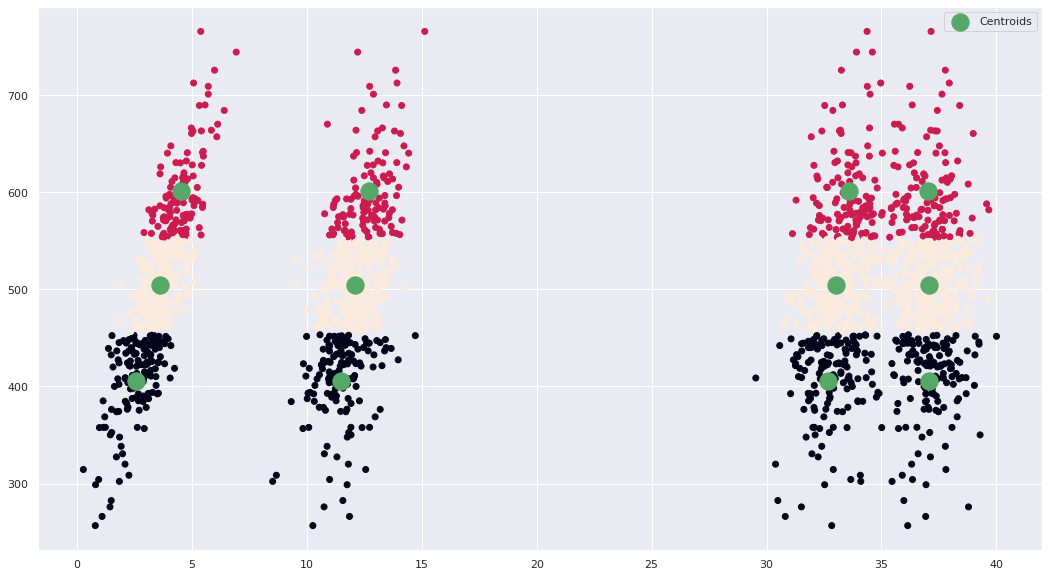

In [165]:
plt.scatter(X.iloc[:,:1], X.iloc[:,-1:], c = y_kmeans)
plt.scatter(X.iloc[:,1:2], X.iloc[:,-1:], c = y_kmeans)
plt.scatter(X.iloc[:,2:3], X.iloc[:,-1:], c = y_kmeans)
plt.scatter(X.iloc[:,3:4], X.iloc[:,-1:], c = y_kmeans)
plt.scatter(kmeans.cluster_centers_[:,:1],kmeans.cluster_centers_[:,-1:], s = 300, c = 'g', label = 'Centroids')
plt.scatter(kmeans.cluster_centers_[:,1:2],kmeans.cluster_centers_[:,-1:], s = 300, c = 'g')
plt.scatter(kmeans.cluster_centers_[:,2:3],kmeans.cluster_centers_[:,-1:], s = 300, c = 'g')
plt.scatter(kmeans.cluster_centers_[:,3:4],kmeans.cluster_centers_[:,-1:], s = 300, c = 'g')
plt.legend()
plt.show()

Distribution of the features after clustered with Cluster 1
Distribution of the features after clustered with Cluster 2
Distribution of the features after clustered with Cluster 3


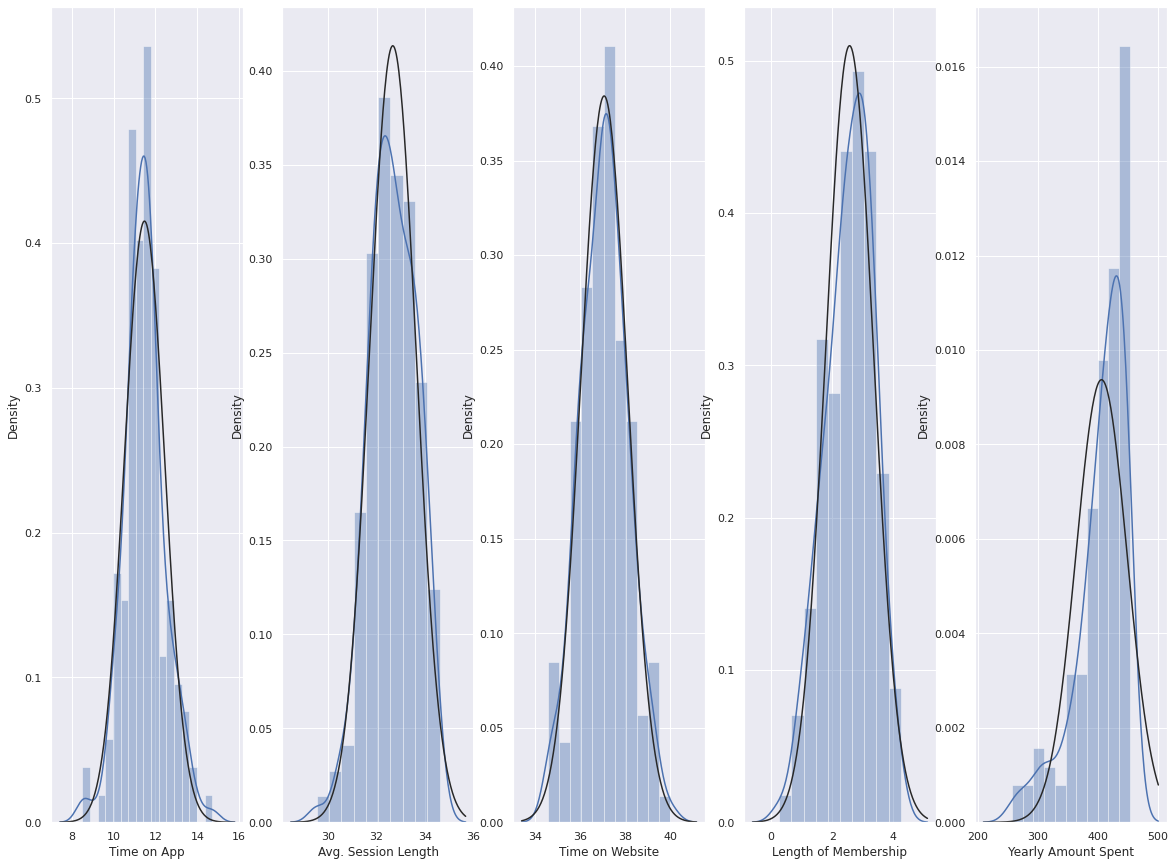

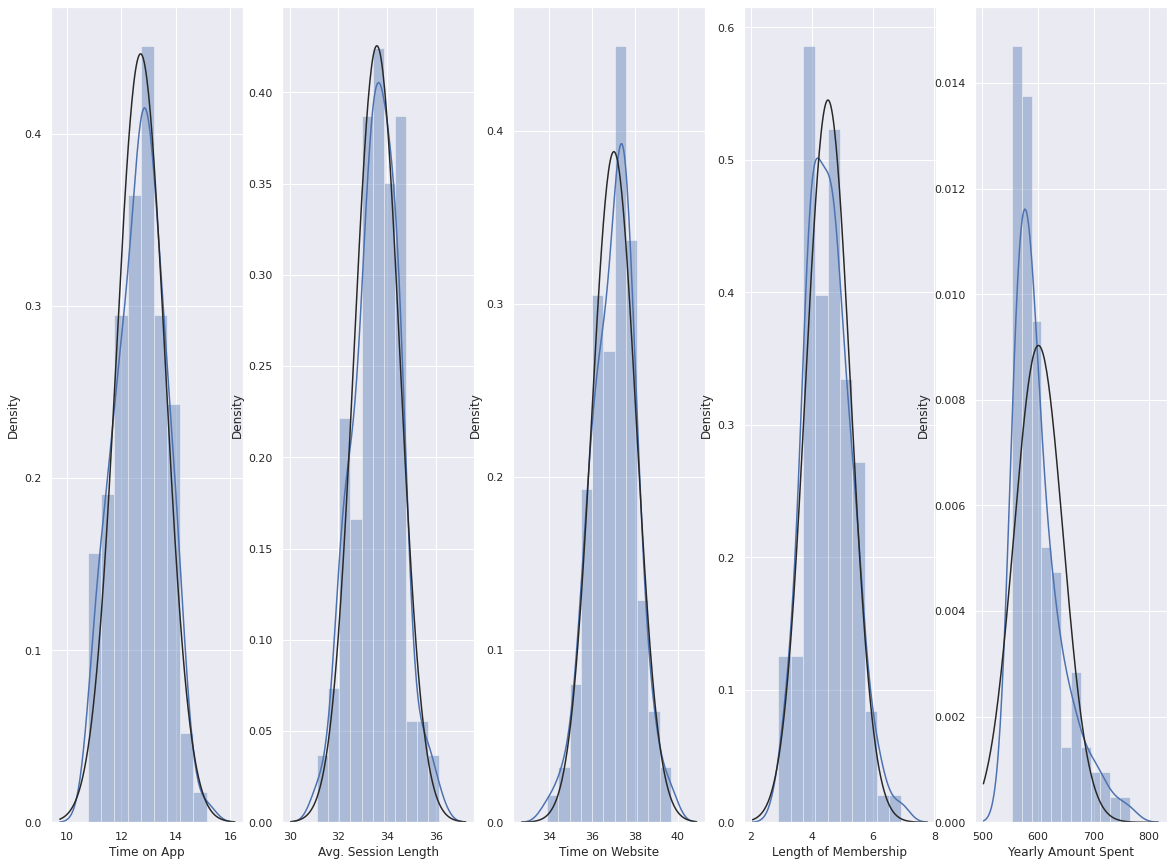

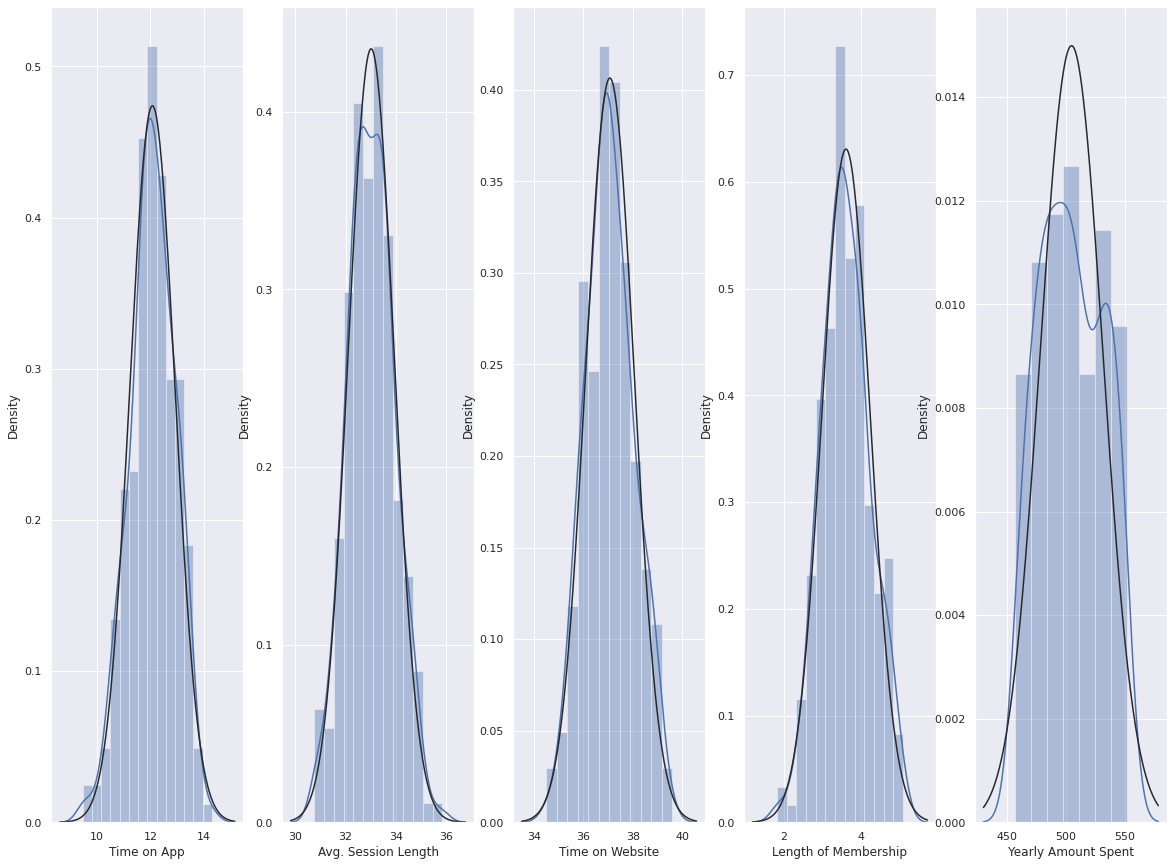

In [170]:
for i in range(0,3):
    data = X[y_kmeans == i]
    print('Distribution of the features after clustered with Cluster ' + str(i +1))
    fig, ax = plt.subplots(1, 5, figsize=(20,15))
    for i, subplot in zip(features, ax.flatten()):
        sns.distplot(data[i], fit=norm ,ax = subplot)

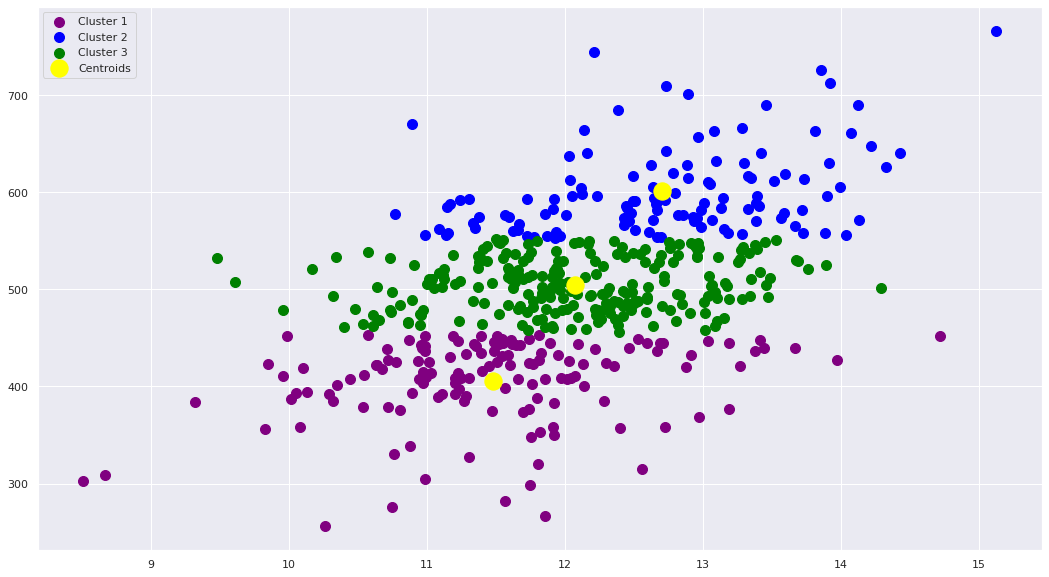

In [198]:
plt.scatter(X.loc[y_kmeans == 0, features[0]], X.loc[y_kmeans == 0, features[-1]],s = 100, c = 'purple', label= 'Cluster 1')
plt.scatter(X.loc[y_kmeans == 1, features[0]], X.loc[y_kmeans == 1, features[-1]],s = 100, c = 'blue', label= 'Cluster 2')
plt.scatter(X.loc[y_kmeans == 2, features[0]], X.loc[y_kmeans == 2, features[-1]],s = 100, c = 'green', label= 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,-1], s = 300, c = 'yellow', label = 'Centroids')
plt.legend()
plt.show()

In [212]:
## function visualiztion clustering
def cluster_visual(data, label, k, feature, target, idx):
    color = ['purple','blue','green']
    for i in range(k):
        plt.scatter(data.loc[label == i, feature], data.loc[label==i, target], s = 100\
                   ,c = color[i], label = 'Cluster ' + str(i +1))
    plt.scatter(kmeans.cluster_centers_[:,idx],kmeans.cluster_centers_[:,-1], s = 300\
                , c = 'yellow', label = 'Centroids')
    plt.title('Cluster of {}'.format(feature))
    plt.legend()
    plt.show()

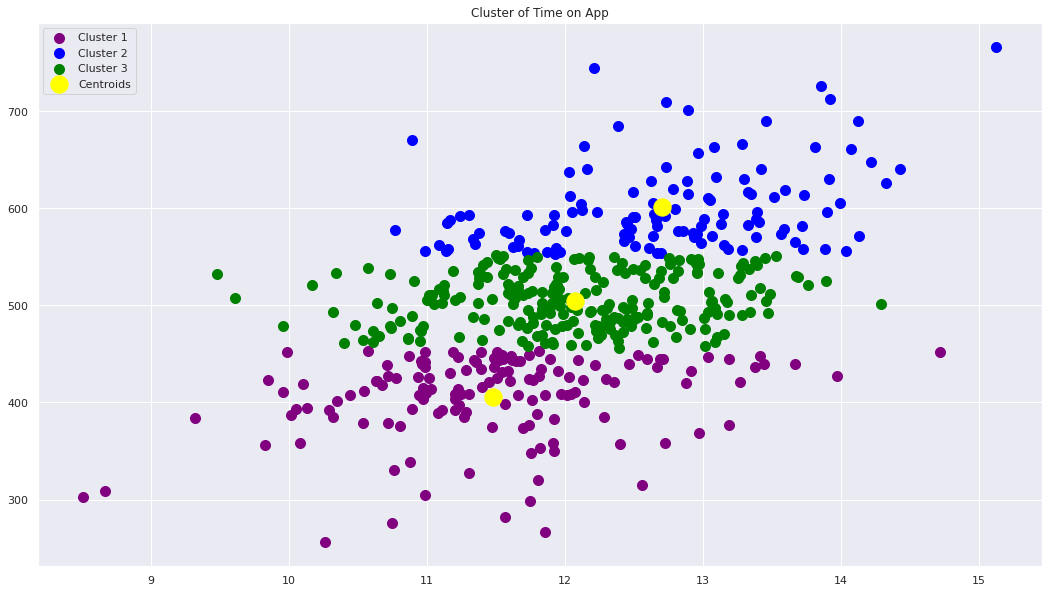

In [208]:
k = 3
cluster_visual(X, y_kmeans, k, features[0], features[-1])

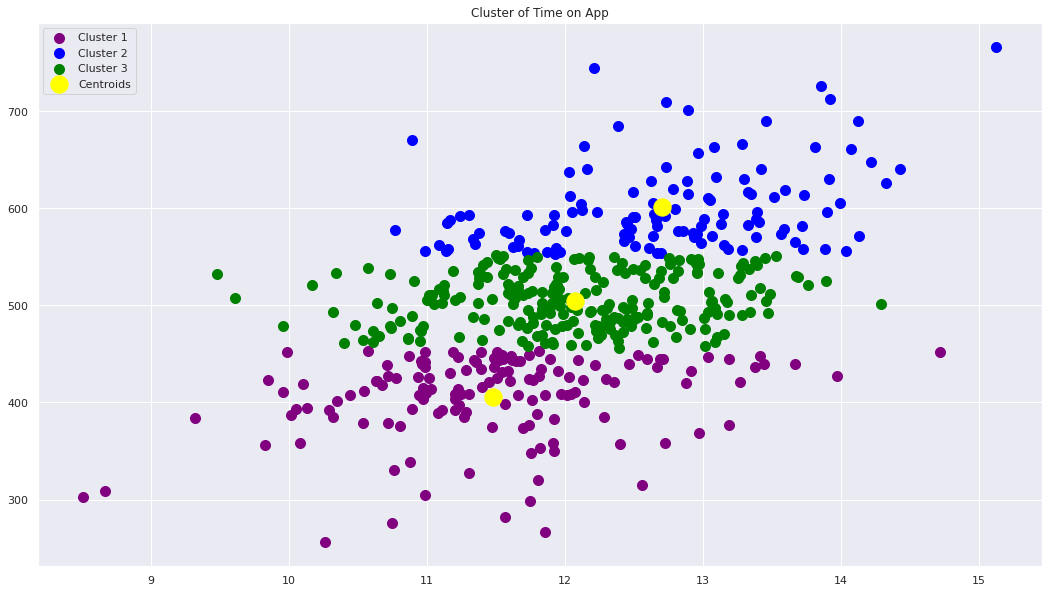

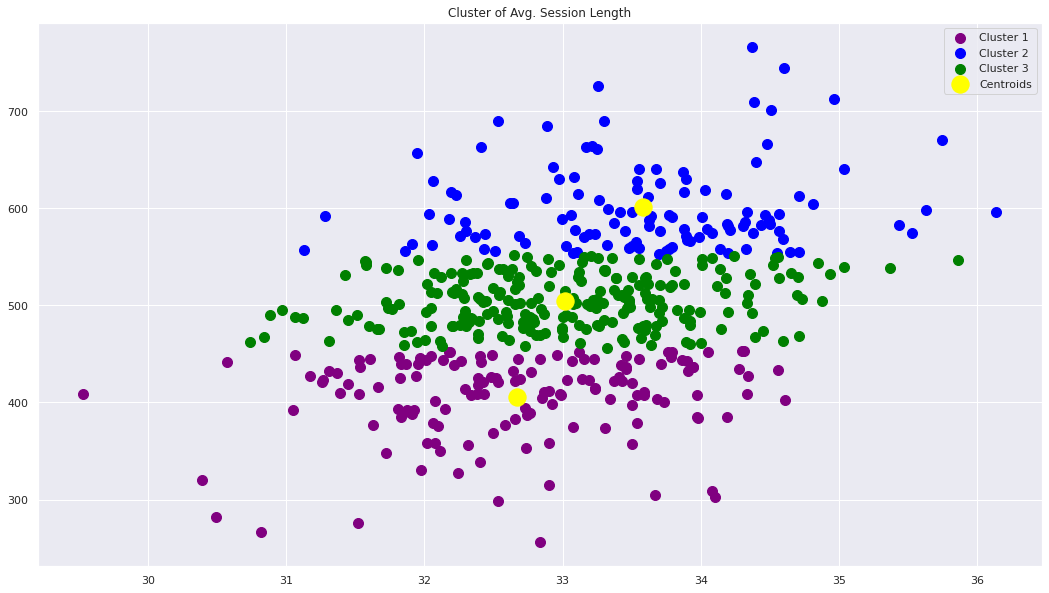

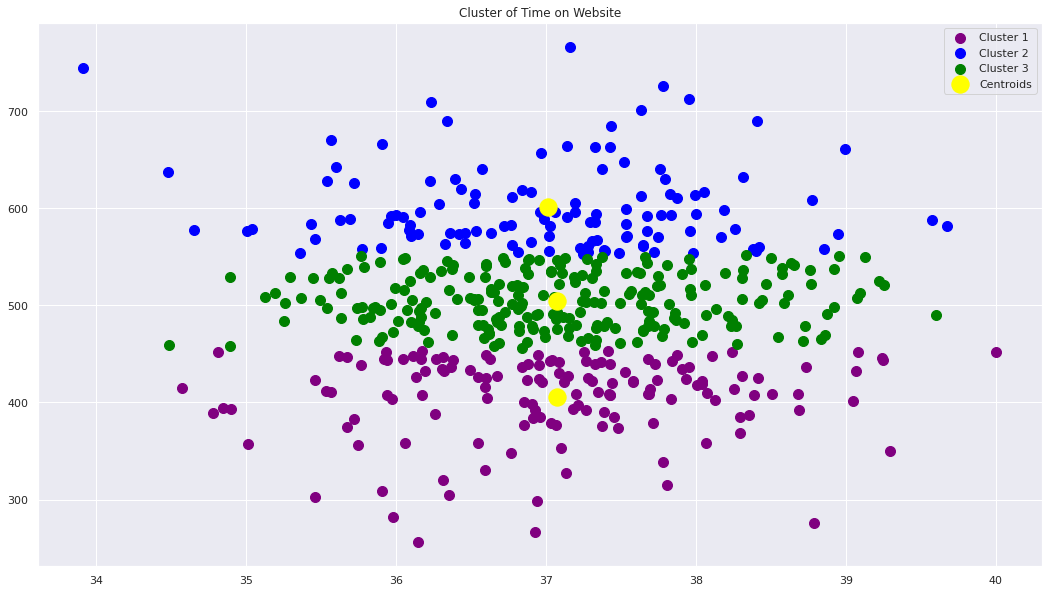

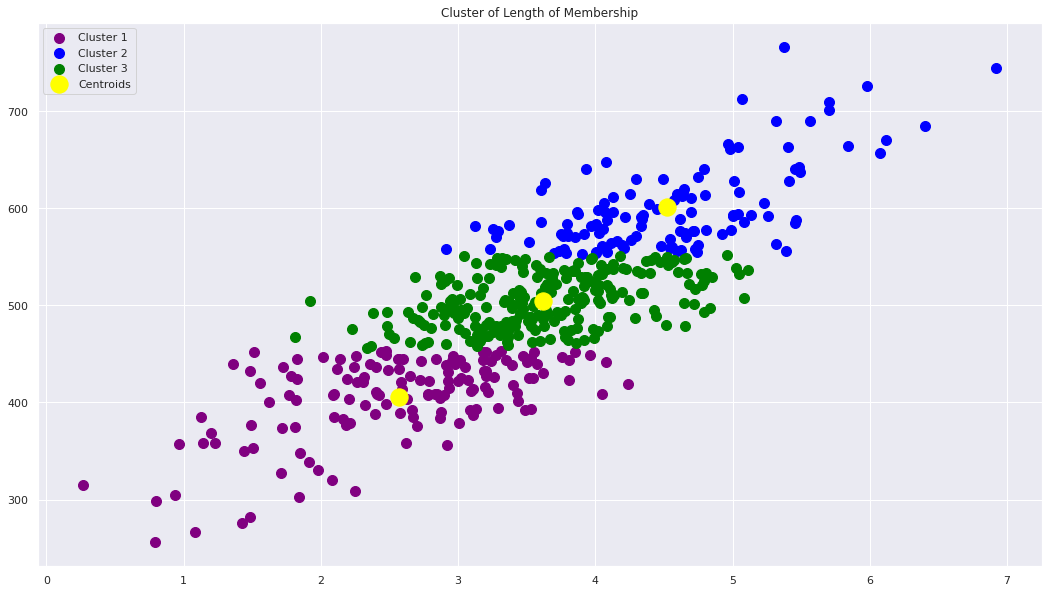

In [213]:
for idx, value in enumerate(features[:-1]):
     cluster_visual(X, y_kmeans, k, value, features[-1], idx)

## Các quyết định và chiến lược tham khảo từ kết quả sau khi Cluster:

##### Sau khi thử và visualization để quyết định chọn k để Cluster dữ liệu thì thấy k = 3 là số lượng nhóm hợp lý nhất.

1. Có thể dễ dàng thấy từ các biểu đồ scatter của các feature với target dữ liệu được chia thành 3 phần rõ rệt với sự phân chia theo thứ tự tăng dần của target.
2. Dựa vào sự phân chia này sẽ có 3 nhóm khách hàng cụ thể theo việc chi tiêu, từ đó sẽ có các chiến lược marketing, dịch vụ khác nhau với các nhóm khách hàng riêng biệt. Cụ thể như:
    - 2.1 Nhóm Cluster 1 - Chi tiêu thấp: việc cần làm là đánh giá khả năng nhóm này có khả năng lên Cluster 2 hoặc 3 hay không? Vì nếu bỏ những khách hàng này sẽ mất đi rất nhiều khách hàng trong đó có thể là những khách hàng tiềm năng. Vì vậy phải đánh giá thông qua nhiều tiêu chí của nhóm khách hàng này. Quyết định ở đây có thể là tặng quà khi mùa hàng, áp dụng các khuyến mãi giảm giá khi mua với số lượng hàng nhất định -- lưu ý: vì đây là nhóm khách hàng chi tiêu thấp nên việc khuyến mãi cũng cần tùy theo mức độ này mà ra chiến lược.
    - 2.2 Nhóm Cluster 2 - Chi tiêu trung bình: đầu tiên phải giữ chân được khách hàng, vì các khách hàng tầm trung là chiếm đa số trong số lượng khách hàng ở các ngành dịch vụ, hàng hóa. Áp dụng các đợt khuyến mãi đặc biệt, tri ân khách hàng, tổ chức các game show, trò chơi để có thể làm hài lòng và nhận được sự gắn bó từ nhóm khách hàng này.
    - 2.3 Nhóm Cluster 3 - Chi tiêu cao: trong thực tế đa số nhóm khách hàng này có số lượng sẽ thấp hơn 2 nhóm trên nhưng nguồn doanh thu từ nhóm khách hàng này là rất cao, vì họ sẵn sàng bỏ ra những số tiền lớn cho sản phẩm, vì vậy ưu tiên hàng đầu ở đây là chăm sóc khách hàng, chế độ hậu mãi, tri ân khách hàng.

# TODO 4: DECISION TREE

In [233]:
highval = data['Yearly Amount Spent'].quantile(0.8)

In [249]:
decision = data.copy()

In [250]:
decision['highVal_cus'] = decision['Yearly Amount Spent'].apply(lambda x : 1 if x > highval else 0)

In [251]:
decision.head()

,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,domain,city,NAME,TYPE,stateGDP,stateGDPperc,gdpGrowth2018,domain_type,domain_site,highVal_cus
0,Violet,34.497268,12.655651,39.577668,4.082621,587.951054,fernandez.com,MI,Michigan,STATE,524828.0,0.025,2.7,individual,other,1
1,DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933,hotmail.com,CA,California,STATE,3120386.0,0.147,3.5,company,hotmail,0
2,Bisque,33.000915,11.330278,37.110597,4.104543,487.547505,yahoo.com,DC,District of Columbia,Territory/Commonwealth,NaN,NaN,NaN,company,yahoo,0
3,SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344,gmail.com,OH,Ohio,STATE,683460.0,0.032,1.8,company,gmail,1
4,MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092,davidson-herman.com,PR,Puerto Rico,Territory/Commonwealth,NaN,NaN,NaN,individual,other,1


In [252]:
decision.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 0 to 499
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Avatar                500 non-null    object 
 1   Avg. Session Length   500 non-null    float64
 2   Time on App           500 non-null    float64
 3   Time on Website       500 non-null    float64
 4   Length of Membership  500 non-null    float64
 5   Yearly Amount Spent   500 non-null    float64
 6   domain                500 non-null    object 
 7   city                  500 non-null    object 
 8   NAME                  440 non-null    object 
 9   TYPE                  500 non-null    object 
 10  stateGDP              307 non-null    float64
 11  stateGDPperc          307 non-null    float64
 12  gdpGrowth2018         307 non-null    float64
 13  domain_type           500 non-null    object 
 14  domain_site           500 non-null    object 
 15  highVal_cus           5

In [253]:
delete_col = ['Avatar','domain','city','NAME','stateGDP','stateGDPperc','gdpGrowth2018']
decision = decision.drop(delete_col, axis = 1)

In [254]:
num = ['Avg. Session Length','Time on App','Length of Membership','Yearly Amount Spent']
standard = StandardScaler()
decision[num] = standard.fit_transform(decision[num])

In [255]:
decision = pd.get_dummies(decision)

In [256]:
decision.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent,highVal_cus,TYPE_STATE,TYPE_Territory/Commonwealth,TYPE_Unknown,domain_type_company,domain_type_individual,domain_site_gmail,domain_site_hotmail,domain_site_other,domain_site_yahoo
0,1.456351,0.607280,39.577668,0.550107,1.118654,1,1,0,0,0,1,0,0,1,0
1,-1.136502,-0.949464,37.268959,-0.870927,-1.351783,0,1,0,0,1,0,0,1,0,0
2,-0.052723,-0.727139,37.110597,0.572067,-0.148501,0,0,1,0,1,0,0,0,0,1
3,1.263010,1.676390,36.721283,-0.413996,1.041684,1,1,0,0,1,0,1,0,0,0
4,0.279838,0.747770,37.536653,0.914422,1.263224,1,0,1,0,0,1,0,0,1,0


In [257]:
y = decision['highVal_cus']
x = decision.drop('highVal_cus', axis=1)

In [258]:
x_train, x_test , y_train, y_test= train_test_split(x,y,test_size=0.2,random_state = 12)

In [259]:
from sklearn.tree import DecisionTreeClassifier

clf_gini = DecisionTreeClassifier(max_depth=5, random_state=0)


# fit the model
clf_gini.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=0)

In [261]:
y_pred = clf_gini.predict(x_test)

In [263]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [267]:
print('Accuracy of model is {}'.format(accuracy_score(y_test, y_pred)))

Accuracy of model is 1.0


In [268]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        82
           1       1.00      1.00      1.00        18

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



[Text(334.8, 326.15999999999997, 'X[4] <= 0.779\ngini = 0.326\nsamples = 400\nvalue = [318, 82]'),
 Text(167.4, 108.72000000000003, 'gini = 0.0\nsamples = 318\nvalue = [318, 0]'),
 Text(502.20000000000005, 108.72000000000003, 'gini = 0.0\nsamples = 82\nvalue = [0, 82]')]

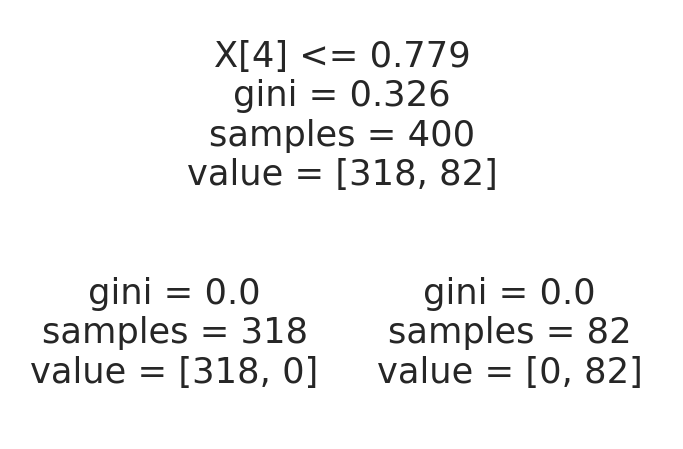

In [269]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(x_train, y_train))